In [2]:
import pandas as pd
import numpy as np
from tsfresh import extract_features

In [27]:
df_1 = pd.read_csv('daily-min-temperatures.csv')

In [28]:
# генерация признаков из временных рядов
extracted_features = extract_features(df_1, column_id='Date', n_jobs=4)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:24<00:00,  1.22s/it]


In [29]:
# избавление от неинформативных столбоцв и редактирование оставшихся нанов
null_cols = []
for col in extracted_features.columns:
    nans_percent = sum(extracted_features[col].isna()) / len(extracted_features) * 100
    if extracted_features[col].sum() == 0 or nans_percent > 10:
        null_cols.append(col)

df_ext_2 = extracted_features.drop(null_cols, axis=1)   
        
for col in df_ext_2.columns:
    if df_ext_2[col].isna().sum() != 0:
        df_ext_2[col] = df_ext_2[col].fillna(df_ext_2[col].mean())

In [30]:
df_ext_2

,Temp__sum_values,Temp__abs_energy,Temp__median,Temp__mean,Temp__length,Temp__root_mean_square,Temp__last_location_of_maximum,Temp__last_location_of_minimum,Temp__ratio_value_number_to_time_series_length,Temp__maximum,...,Temp__range_count__max_1__min_-1,Temp__range_count__max_1000000000000.0__min_0,Temp__energy_ratio_by_chunks__num_segments_10__segment_focus_0,Temp__count_above__t_0,Temp__count_below__t_0,Temp__lempel_ziv_complexity__bins_2,Temp__lempel_ziv_complexity__bins_3,Temp__lempel_ziv_complexity__bins_5,Temp__lempel_ziv_complexity__bins_10,Temp__lempel_ziv_complexity__bins_100
1981-01-01,20.7,428.49,20.7,20.7,1.0,20.7,1.0,1.0,1.0,20.7,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-02,17.9,320.41,17.9,17.9,1.0,17.9,1.0,1.0,1.0,17.9,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-03,18.8,353.44,18.8,18.8,1.0,18.8,1.0,1.0,1.0,18.8,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-04,14.6,213.16,14.6,14.6,1.0,14.6,1.0,1.0,1.0,14.6,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-05,15.8,249.64,15.8,15.8,1.0,15.8,1.0,1.0,1.0,15.8,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,196.00,14.0,14.0,1.0,14.0,1.0,1.0,1.0,14.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-28,13.6,184.96,13.6,13.6,1.0,13.6,1.0,1.0,1.0,13.6,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-29,13.5,182.25,13.5,13.5,1.0,13.5,1.0,1.0,1.0,13.5,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-30,15.7,246.49,15.7,15.7,1.0,15.7,1.0,1.0,1.0,15.7,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [31]:
from sklearn.model_selection import TimeSeriesSplit

In [32]:
# разбиваем дф на обучение и тест
X = df_ext_2.values
y = df.Temp

In [35]:
y

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [36]:
tss = TimeSeriesSplit(10)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
# находим mse в линейной регрессии
lr = LinearRegression()

In [44]:
train_mse = []
test_mse = []
for train_index, test_index in tss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr.fit(X_train, y_train)
    
    mse_train = mean_squared_error(y_train, lr.predict(X_train))
    mse_test = mean_squared_error(y_test, lr.predict(X_test))
    print(f'Train mse: {mse_train}')
    print(f'Test mse: {mse_test}')
    print('-------------------------')
    
    train_mse.append(mse_train)
    test_mse.append(mse_test)

Train mse: 7.365582671152923e-29
Test mse: 7.348096605377976e-29
-------------------------
Train mse: 4.0316971522923366e-29
Test mse: 3.7462466825206725e-29
-------------------------
Train mse: 2.512337390681912e-28
Test mse: 1.8866679714520744e-28
-------------------------
Train mse: 1.8777684167991128e-28
Test mse: 1.8980428511777548e-28
-------------------------
Train mse: 8.661217500846969e-29
Test mse: 7.362139170020211e-29
-------------------------
Train mse: 4.5091227282899873e-29
Test mse: 3.539834567261189e-29
-------------------------
Train mse: 7.580933975705301e-30
Test mse: 7.244084668356017e-30
-------------------------
Train mse: 8.4245754042513e-29
Test mse: 8.975199409348758e-29
-------------------------
Train mse: 5.141862047334105e-30
Test mse: 4.9700396863350804e-30
-------------------------
Train mse: 7.353532864818553e-29
Test mse: 7.440138052693611e-29
-------------------------


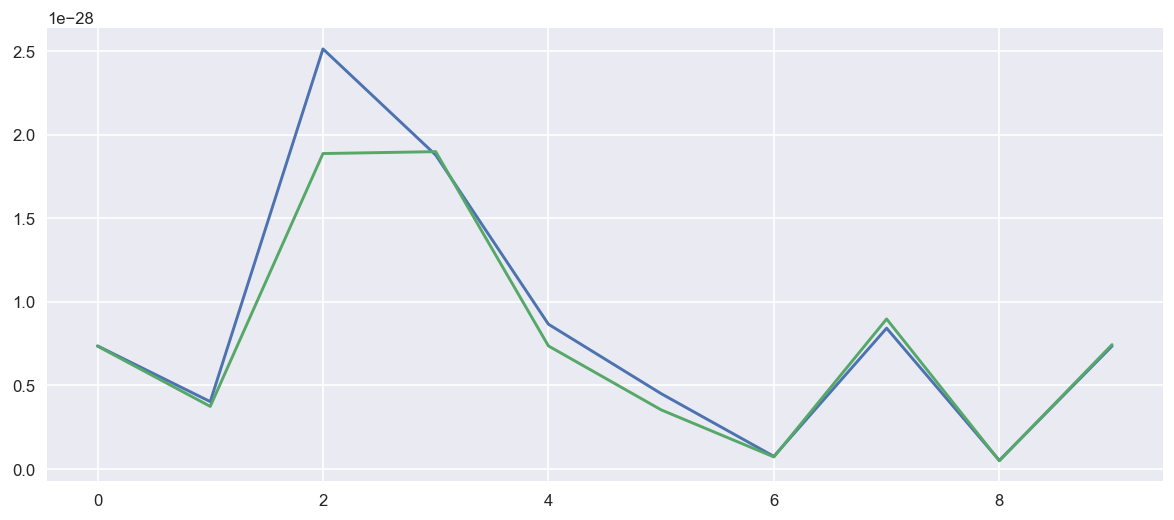

In [45]:
plt.plot(train_mse)
plt.plot(test_mse)

In [41]:
from catboost import CatBoostRegressor

In [46]:
# находим mse в catboost
cbr = CatBoostRegressor()

In [47]:
train_mse_cbr = []
test_mse_cbr = []
for train_index, test_index in tss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cbr.fit(X_train, y_train)
    
    mse_train_cbr = mean_squared_error(y_train, cbr.predict(X_train))
    mse_test_cbr = mean_squared_error(y_test, cbr.predict(X_test))
    print(f'Train mse: {mse_train}')
    print(f'Test mse: {mse_test}')
    print('-------------------------')
    
    train_mse_cbr.append(mse_train)
    test_mse_cbr.append(mse_test)

Learning rate set to 0.032211
0:	learn: 4.2867187	total: 164ms	remaining: 2m 43s
1:	learn: 4.1727907	total: 165ms	remaining: 1m 22s
2:	learn: 4.0572446	total: 167ms	remaining: 55.4s
3:	learn: 3.9503921	total: 168ms	remaining: 41.9s
4:	learn: 3.8401175	total: 170ms	remaining: 33.8s
5:	learn: 3.7381582	total: 171ms	remaining: 28.4s
6:	learn: 3.6368625	total: 173ms	remaining: 24.5s
7:	learn: 3.5402195	total: 174ms	remaining: 21.6s
8:	learn: 3.4430061	total: 176ms	remaining: 19.4s
9:	learn: 3.3477041	total: 178ms	remaining: 17.7s
10:	learn: 3.2567303	total: 180ms	remaining: 16.2s
11:	learn: 3.1700714	total: 182ms	remaining: 15s
12:	learn: 3.0853599	total: 184ms	remaining: 14s
13:	learn: 3.0021886	total: 186ms	remaining: 13.1s
14:	learn: 2.9200517	total: 188ms	remaining: 12.3s
15:	learn: 2.8422305	total: 190ms	remaining: 11.7s
16:	learn: 2.7668185	total: 191ms	remaining: 11.1s
17:	learn: 2.6927168	total: 193ms	remaining: 10.5s
18:	learn: 2.6227161	total: 195ms	remaining: 10.1s
19:	learn: 2.

233:	learn: 0.0984715	total: 510ms	remaining: 1.67s
234:	learn: 0.0977646	total: 511ms	remaining: 1.66s
235:	learn: 0.0971707	total: 513ms	remaining: 1.66s
236:	learn: 0.0969500	total: 514ms	remaining: 1.66s
237:	learn: 0.0967235	total: 516ms	remaining: 1.65s
238:	learn: 0.0965185	total: 517ms	remaining: 1.65s
239:	learn: 0.0959016	total: 519ms	remaining: 1.64s
240:	learn: 0.0955202	total: 520ms	remaining: 1.64s
241:	learn: 0.0948870	total: 522ms	remaining: 1.63s
242:	learn: 0.0945797	total: 523ms	remaining: 1.63s
243:	learn: 0.0943742	total: 525ms	remaining: 1.63s
244:	learn: 0.0937405	total: 527ms	remaining: 1.62s
245:	learn: 0.0931800	total: 529ms	remaining: 1.62s
246:	learn: 0.0929648	total: 531ms	remaining: 1.62s
247:	learn: 0.0927758	total: 533ms	remaining: 1.61s
248:	learn: 0.0925828	total: 534ms	remaining: 1.61s
249:	learn: 0.0920000	total: 535ms	remaining: 1.61s
250:	learn: 0.0914638	total: 537ms	remaining: 1.6s
251:	learn: 0.0912854	total: 539ms	remaining: 1.6s
252:	learn: 0.

469:	learn: 0.0546597	total: 854ms	remaining: 963ms
470:	learn: 0.0545291	total: 856ms	remaining: 961ms
471:	learn: 0.0544687	total: 857ms	remaining: 959ms
472:	learn: 0.0543127	total: 859ms	remaining: 957ms
473:	learn: 0.0542031	total: 861ms	remaining: 955ms
474:	learn: 0.0539707	total: 863ms	remaining: 953ms
475:	learn: 0.0538301	total: 864ms	remaining: 951ms
476:	learn: 0.0537149	total: 866ms	remaining: 949ms
477:	learn: 0.0534987	total: 867ms	remaining: 947ms
478:	learn: 0.0534856	total: 869ms	remaining: 945ms
479:	learn: 0.0533689	total: 871ms	remaining: 943ms
480:	learn: 0.0532344	total: 872ms	remaining: 941ms
481:	learn: 0.0530981	total: 875ms	remaining: 940ms
482:	learn: 0.0530854	total: 877ms	remaining: 938ms
483:	learn: 0.0529523	total: 878ms	remaining: 936ms
484:	learn: 0.0529396	total: 881ms	remaining: 935ms
485:	learn: 0.0528330	total: 882ms	remaining: 933ms
486:	learn: 0.0527363	total: 885ms	remaining: 932ms
487:	learn: 0.0526321	total: 888ms	remaining: 931ms
488:	learn: 

698:	learn: 0.0358028	total: 1.19s	remaining: 512ms
699:	learn: 0.0357848	total: 1.19s	remaining: 511ms
700:	learn: 0.0357017	total: 1.19s	remaining: 509ms
701:	learn: 0.0356420	total: 1.19s	remaining: 507ms
702:	learn: 0.0355985	total: 1.2s	remaining: 505ms
703:	learn: 0.0355371	total: 1.2s	remaining: 504ms
704:	learn: 0.0355230	total: 1.2s	remaining: 502ms
705:	learn: 0.0354255	total: 1.2s	remaining: 500ms
706:	learn: 0.0353652	total: 1.2s	remaining: 498ms
707:	learn: 0.0353538	total: 1.2s	remaining: 497ms
708:	learn: 0.0353480	total: 1.21s	remaining: 495ms
709:	learn: 0.0352607	total: 1.21s	remaining: 493ms
710:	learn: 0.0352201	total: 1.21s	remaining: 491ms
711:	learn: 0.0351779	total: 1.21s	remaining: 490ms
712:	learn: 0.0351037	total: 1.21s	remaining: 488ms
713:	learn: 0.0350924	total: 1.21s	remaining: 486ms
714:	learn: 0.0350601	total: 1.22s	remaining: 485ms
715:	learn: 0.0350368	total: 1.22s	remaining: 483ms
716:	learn: 0.0350115	total: 1.22s	remaining: 481ms
717:	learn: 0.0350

929:	learn: 0.0282019	total: 1.52s	remaining: 114ms
930:	learn: 0.0281855	total: 1.52s	remaining: 113ms
931:	learn: 0.0281284	total: 1.52s	remaining: 111ms
932:	learn: 0.0281194	total: 1.52s	remaining: 109ms
933:	learn: 0.0280772	total: 1.52s	remaining: 108ms
934:	learn: 0.0280684	total: 1.52s	remaining: 106ms
935:	learn: 0.0280620	total: 1.53s	remaining: 104ms
936:	learn: 0.0280568	total: 1.53s	remaining: 103ms
937:	learn: 0.0280222	total: 1.53s	remaining: 101ms
938:	learn: 0.0280174	total: 1.53s	remaining: 99.5ms
939:	learn: 0.0280010	total: 1.53s	remaining: 97.9ms
940:	learn: 0.0279542	total: 1.53s	remaining: 96.2ms
941:	learn: 0.0279464	total: 1.54s	remaining: 94.6ms
942:	learn: 0.0279304	total: 1.54s	remaining: 93ms
943:	learn: 0.0278929	total: 1.54s	remaining: 91.4ms
944:	learn: 0.0278877	total: 1.54s	remaining: 89.7ms
945:	learn: 0.0278570	total: 1.54s	remaining: 88.1ms
946:	learn: 0.0278473	total: 1.54s	remaining: 86.5ms
947:	learn: 0.0278073	total: 1.55s	remaining: 84.8ms
948:

107:	learn: 0.2267677	total: 203ms	remaining: 1.67s
108:	learn: 0.2220711	total: 205ms	remaining: 1.67s
109:	learn: 0.2176459	total: 207ms	remaining: 1.67s
110:	learn: 0.2134823	total: 209ms	remaining: 1.67s
111:	learn: 0.2095417	total: 211ms	remaining: 1.67s
112:	learn: 0.2054532	total: 213ms	remaining: 1.67s
113:	learn: 0.2016745	total: 215ms	remaining: 1.67s
114:	learn: 0.1979922	total: 218ms	remaining: 1.67s
115:	learn: 0.1944345	total: 220ms	remaining: 1.68s
116:	learn: 0.1908822	total: 222ms	remaining: 1.68s
117:	learn: 0.1874925	total: 225ms	remaining: 1.68s
118:	learn: 0.1842328	total: 227ms	remaining: 1.68s
119:	learn: 0.1810638	total: 229ms	remaining: 1.68s
120:	learn: 0.1780535	total: 231ms	remaining: 1.67s
121:	learn: 0.1749632	total: 233ms	remaining: 1.68s
122:	learn: 0.1721279	total: 235ms	remaining: 1.68s
123:	learn: 0.1693223	total: 237ms	remaining: 1.68s
124:	learn: 0.1665305	total: 239ms	remaining: 1.67s
125:	learn: 0.1640813	total: 241ms	remaining: 1.67s
126:	learn: 

269:	learn: 0.0832864	total: 521ms	remaining: 1.41s
270:	learn: 0.0832199	total: 523ms	remaining: 1.41s
271:	learn: 0.0831494	total: 525ms	remaining: 1.41s
272:	learn: 0.0823871	total: 527ms	remaining: 1.4s
273:	learn: 0.0823187	total: 529ms	remaining: 1.4s
274:	learn: 0.0817644	total: 531ms	remaining: 1.4s
275:	learn: 0.0810610	total: 533ms	remaining: 1.4s
276:	learn: 0.0809965	total: 536ms	remaining: 1.4s
277:	learn: 0.0809315	total: 538ms	remaining: 1.4s
278:	learn: 0.0808692	total: 540ms	remaining: 1.4s
279:	learn: 0.0801795	total: 542ms	remaining: 1.39s
280:	learn: 0.0801177	total: 545ms	remaining: 1.39s
281:	learn: 0.0800583	total: 548ms	remaining: 1.39s
282:	learn: 0.0794422	total: 550ms	remaining: 1.39s
283:	learn: 0.0793831	total: 552ms	remaining: 1.39s
284:	learn: 0.0787429	total: 554ms	remaining: 1.39s
285:	learn: 0.0786892	total: 556ms	remaining: 1.39s
286:	learn: 0.0786328	total: 559ms	remaining: 1.39s
287:	learn: 0.0785786	total: 560ms	remaining: 1.39s
288:	learn: 0.07852

433:	learn: 0.0539594	total: 856ms	remaining: 1.12s
434:	learn: 0.0538826	total: 858ms	remaining: 1.11s
435:	learn: 0.0538093	total: 860ms	remaining: 1.11s
436:	learn: 0.0537157	total: 863ms	remaining: 1.11s
437:	learn: 0.0535428	total: 865ms	remaining: 1.11s
438:	learn: 0.0534593	total: 867ms	remaining: 1.11s
439:	learn: 0.0532439	total: 869ms	remaining: 1.11s
440:	learn: 0.0532172	total: 871ms	remaining: 1.1s
441:	learn: 0.0530606	total: 873ms	remaining: 1.1s
442:	learn: 0.0529921	total: 876ms	remaining: 1.1s
443:	learn: 0.0528528	total: 878ms	remaining: 1.1s
444:	learn: 0.0526454	total: 880ms	remaining: 1.1s
445:	learn: 0.0525009	total: 882ms	remaining: 1.09s
446:	learn: 0.0523337	total: 884ms	remaining: 1.09s
447:	learn: 0.0522534	total: 887ms	remaining: 1.09s
448:	learn: 0.0521797	total: 890ms	remaining: 1.09s
449:	learn: 0.0520846	total: 892ms	remaining: 1.09s
450:	learn: 0.0520190	total: 894ms	remaining: 1.09s
451:	learn: 0.0518194	total: 895ms	remaining: 1.08s
452:	learn: 0.051

613:	learn: 0.0395838	total: 1.2s	remaining: 753ms
614:	learn: 0.0395643	total: 1.2s	remaining: 752ms
615:	learn: 0.0394474	total: 1.2s	remaining: 750ms
616:	learn: 0.0393965	total: 1.2s	remaining: 748ms
617:	learn: 0.0393580	total: 1.21s	remaining: 746ms
618:	learn: 0.0392400	total: 1.21s	remaining: 744ms
619:	learn: 0.0391914	total: 1.21s	remaining: 742ms
620:	learn: 0.0391199	total: 1.21s	remaining: 740ms
621:	learn: 0.0390508	total: 1.21s	remaining: 738ms
622:	learn: 0.0389343	total: 1.22s	remaining: 737ms
623:	learn: 0.0389251	total: 1.22s	remaining: 735ms
624:	learn: 0.0388602	total: 1.22s	remaining: 733ms
625:	learn: 0.0388431	total: 1.22s	remaining: 731ms
626:	learn: 0.0387830	total: 1.23s	remaining: 729ms
627:	learn: 0.0387742	total: 1.23s	remaining: 727ms
628:	learn: 0.0387066	total: 1.23s	remaining: 725ms
629:	learn: 0.0386873	total: 1.23s	remaining: 723ms
630:	learn: 0.0386674	total: 1.23s	remaining: 721ms
631:	learn: 0.0386432	total: 1.23s	remaining: 719ms
632:	learn: 0.03

790:	learn: 0.0320637	total: 1.53s	remaining: 405ms
791:	learn: 0.0320590	total: 1.53s	remaining: 403ms
792:	learn: 0.0319833	total: 1.53s	remaining: 401ms
793:	learn: 0.0319616	total: 1.54s	remaining: 399ms
794:	learn: 0.0319465	total: 1.54s	remaining: 397ms
795:	learn: 0.0319049	total: 1.54s	remaining: 395ms
796:	learn: 0.0318486	total: 1.54s	remaining: 393ms
797:	learn: 0.0318052	total: 1.55s	remaining: 391ms
798:	learn: 0.0317892	total: 1.55s	remaining: 389ms
799:	learn: 0.0317639	total: 1.55s	remaining: 388ms
800:	learn: 0.0317157	total: 1.55s	remaining: 386ms
801:	learn: 0.0316872	total: 1.55s	remaining: 384ms
802:	learn: 0.0316596	total: 1.56s	remaining: 382ms
803:	learn: 0.0316439	total: 1.56s	remaining: 380ms
804:	learn: 0.0315678	total: 1.56s	remaining: 378ms
805:	learn: 0.0315241	total: 1.56s	remaining: 376ms
806:	learn: 0.0315088	total: 1.56s	remaining: 374ms
807:	learn: 0.0314697	total: 1.57s	remaining: 373ms
808:	learn: 0.0314525	total: 1.57s	remaining: 371ms
809:	learn: 

953:	learn: 0.0270153	total: 1.86s	remaining: 89.9ms
954:	learn: 0.0269490	total: 1.87s	remaining: 88ms
955:	learn: 0.0269175	total: 1.87s	remaining: 86ms
956:	learn: 0.0268929	total: 1.87s	remaining: 84.1ms
957:	learn: 0.0268711	total: 1.87s	remaining: 82.2ms
958:	learn: 0.0268317	total: 1.88s	remaining: 80.2ms
959:	learn: 0.0267994	total: 1.88s	remaining: 78.3ms
960:	learn: 0.0267704	total: 1.88s	remaining: 76.3ms
961:	learn: 0.0267516	total: 1.88s	remaining: 74.4ms
962:	learn: 0.0267332	total: 1.89s	remaining: 72.5ms
963:	learn: 0.0267163	total: 1.89s	remaining: 70.5ms
964:	learn: 0.0266903	total: 1.89s	remaining: 68.6ms
965:	learn: 0.0266791	total: 1.89s	remaining: 66.6ms
966:	learn: 0.0266680	total: 1.89s	remaining: 64.7ms
967:	learn: 0.0266501	total: 1.9s	remaining: 62.7ms
968:	learn: 0.0266380	total: 1.9s	remaining: 60.8ms
969:	learn: 0.0265969	total: 1.9s	remaining: 58.8ms
970:	learn: 0.0265728	total: 1.9s	remaining: 56.9ms
971:	learn: 0.0265289	total: 1.91s	remaining: 54.9ms
9

160:	learn: 0.1022226	total: 357ms	remaining: 1.86s
161:	learn: 0.1011698	total: 359ms	remaining: 1.86s
162:	learn: 0.1008690	total: 361ms	remaining: 1.85s
163:	learn: 0.0997586	total: 363ms	remaining: 1.85s
164:	learn: 0.0988594	total: 365ms	remaining: 1.85s
165:	learn: 0.0985837	total: 367ms	remaining: 1.84s
166:	learn: 0.0983249	total: 369ms	remaining: 1.84s
167:	learn: 0.0980776	total: 372ms	remaining: 1.84s
168:	learn: 0.0970595	total: 374ms	remaining: 1.84s
169:	learn: 0.0967975	total: 376ms	remaining: 1.84s
170:	learn: 0.0963451	total: 380ms	remaining: 1.84s
171:	learn: 0.0959480	total: 382ms	remaining: 1.84s
172:	learn: 0.0957253	total: 383ms	remaining: 1.83s
173:	learn: 0.0955105	total: 385ms	remaining: 1.82s
174:	learn: 0.0945759	total: 387ms	remaining: 1.82s
175:	learn: 0.0943587	total: 388ms	remaining: 1.82s
176:	learn: 0.0940234	total: 390ms	remaining: 1.81s
177:	learn: 0.0938196	total: 392ms	remaining: 1.81s
178:	learn: 0.0936470	total: 393ms	remaining: 1.8s
179:	learn: 0

331:	learn: 0.0607084	total: 689ms	remaining: 1.39s
332:	learn: 0.0606927	total: 691ms	remaining: 1.38s
333:	learn: 0.0604228	total: 693ms	remaining: 1.38s
334:	learn: 0.0602911	total: 695ms	remaining: 1.38s
335:	learn: 0.0601315	total: 697ms	remaining: 1.38s
336:	learn: 0.0599739	total: 700ms	remaining: 1.38s
337:	learn: 0.0597966	total: 702ms	remaining: 1.37s
338:	learn: 0.0596437	total: 704ms	remaining: 1.37s
339:	learn: 0.0594545	total: 707ms	remaining: 1.37s
340:	learn: 0.0594334	total: 709ms	remaining: 1.37s
341:	learn: 0.0592402	total: 711ms	remaining: 1.37s
342:	learn: 0.0590125	total: 713ms	remaining: 1.37s
343:	learn: 0.0589990	total: 715ms	remaining: 1.36s
344:	learn: 0.0588562	total: 717ms	remaining: 1.36s
345:	learn: 0.0588361	total: 720ms	remaining: 1.36s
346:	learn: 0.0588164	total: 722ms	remaining: 1.36s
347:	learn: 0.0587971	total: 724ms	remaining: 1.36s
348:	learn: 0.0587247	total: 726ms	remaining: 1.35s
349:	learn: 0.0585460	total: 728ms	remaining: 1.35s
350:	learn: 

557:	learn: 0.0395117	total: 1.19s	remaining: 942ms
558:	learn: 0.0394402	total: 1.19s	remaining: 940ms
559:	learn: 0.0393719	total: 1.19s	remaining: 938ms
560:	learn: 0.0392845	total: 1.2s	remaining: 936ms
561:	learn: 0.0392724	total: 1.2s	remaining: 935ms
562:	learn: 0.0392422	total: 1.2s	remaining: 933ms
563:	learn: 0.0391697	total: 1.2s	remaining: 931ms
564:	learn: 0.0391306	total: 1.21s	remaining: 929ms
565:	learn: 0.0390527	total: 1.21s	remaining: 928ms
566:	learn: 0.0390109	total: 1.21s	remaining: 927ms
567:	learn: 0.0389748	total: 1.22s	remaining: 925ms
568:	learn: 0.0389402	total: 1.22s	remaining: 923ms
569:	learn: 0.0388283	total: 1.22s	remaining: 921ms
570:	learn: 0.0387604	total: 1.22s	remaining: 919ms
571:	learn: 0.0387257	total: 1.23s	remaining: 917ms
572:	learn: 0.0386608	total: 1.23s	remaining: 916ms
573:	learn: 0.0386024	total: 1.23s	remaining: 914ms
574:	learn: 0.0385833	total: 1.23s	remaining: 912ms
575:	learn: 0.0385718	total: 1.24s	remaining: 910ms
576:	learn: 0.03

762:	learn: 0.0302313	total: 1.7s	remaining: 527ms
763:	learn: 0.0302204	total: 1.7s	remaining: 525ms
764:	learn: 0.0301867	total: 1.7s	remaining: 522ms
765:	learn: 0.0301789	total: 1.7s	remaining: 520ms
766:	learn: 0.0301315	total: 1.71s	remaining: 518ms
767:	learn: 0.0301037	total: 1.71s	remaining: 516ms
768:	learn: 0.0300898	total: 1.71s	remaining: 514ms
769:	learn: 0.0300430	total: 1.71s	remaining: 512ms
770:	learn: 0.0300294	total: 1.72s	remaining: 509ms
771:	learn: 0.0299972	total: 1.72s	remaining: 507ms
772:	learn: 0.0299512	total: 1.72s	remaining: 505ms
773:	learn: 0.0298872	total: 1.72s	remaining: 503ms
774:	learn: 0.0298184	total: 1.73s	remaining: 501ms
775:	learn: 0.0298087	total: 1.73s	remaining: 499ms
776:	learn: 0.0297327	total: 1.73s	remaining: 497ms
777:	learn: 0.0297082	total: 1.73s	remaining: 494ms
778:	learn: 0.0296842	total: 1.74s	remaining: 492ms
779:	learn: 0.0296427	total: 1.74s	remaining: 490ms
780:	learn: 0.0296338	total: 1.74s	remaining: 488ms
781:	learn: 0.02

971:	learn: 0.0246036	total: 2.2s	remaining: 63.3ms
972:	learn: 0.0245998	total: 2.2s	remaining: 61ms
973:	learn: 0.0245561	total: 2.2s	remaining: 58.8ms
974:	learn: 0.0244843	total: 2.21s	remaining: 56.5ms
975:	learn: 0.0244717	total: 2.21s	remaining: 54.3ms
976:	learn: 0.0244513	total: 2.21s	remaining: 52.1ms
977:	learn: 0.0244440	total: 2.21s	remaining: 49.8ms
978:	learn: 0.0243962	total: 2.22s	remaining: 47.5ms
979:	learn: 0.0243754	total: 2.22s	remaining: 45.3ms
980:	learn: 0.0243389	total: 2.22s	remaining: 43ms
981:	learn: 0.0243374	total: 2.22s	remaining: 40.7ms
982:	learn: 0.0243035	total: 2.23s	remaining: 38.5ms
983:	learn: 0.0242727	total: 2.23s	remaining: 36.2ms
984:	learn: 0.0242628	total: 2.23s	remaining: 34ms
985:	learn: 0.0242563	total: 2.23s	remaining: 31.7ms
986:	learn: 0.0242283	total: 2.23s	remaining: 29.4ms
987:	learn: 0.0241755	total: 2.24s	remaining: 27.2ms
988:	learn: 0.0241336	total: 2.24s	remaining: 24.9ms
989:	learn: 0.0241298	total: 2.24s	remaining: 22.6ms
99

150:	learn: 0.0974870	total: 372ms	remaining: 2.09s
151:	learn: 0.0972044	total: 376ms	remaining: 2.1s
152:	learn: 0.0968884	total: 379ms	remaining: 2.1s
153:	learn: 0.0966119	total: 381ms	remaining: 2.09s
154:	learn: 0.0958422	total: 383ms	remaining: 2.09s
155:	learn: 0.0953754	total: 385ms	remaining: 2.08s
156:	learn: 0.0951513	total: 388ms	remaining: 2.08s
157:	learn: 0.0948529	total: 392ms	remaining: 2.09s
158:	learn: 0.0946330	total: 393ms	remaining: 2.08s
159:	learn: 0.0941405	total: 395ms	remaining: 2.08s
160:	learn: 0.0939333	total: 397ms	remaining: 2.07s
161:	learn: 0.0937126	total: 399ms	remaining: 2.06s
162:	learn: 0.0933337	total: 401ms	remaining: 2.06s
163:	learn: 0.0931239	total: 404ms	remaining: 2.06s
164:	learn: 0.0926759	total: 407ms	remaining: 2.06s
165:	learn: 0.0924402	total: 410ms	remaining: 2.06s
166:	learn: 0.0922440	total: 412ms	remaining: 2.05s
167:	learn: 0.0919246	total: 414ms	remaining: 2.05s
168:	learn: 0.0914601	total: 416ms	remaining: 2.04s
169:	learn: 0.

351:	learn: 0.0545971	total: 875ms	remaining: 1.61s
352:	learn: 0.0543640	total: 877ms	remaining: 1.61s
353:	learn: 0.0543315	total: 881ms	remaining: 1.61s
354:	learn: 0.0541819	total: 884ms	remaining: 1.61s
355:	learn: 0.0541244	total: 887ms	remaining: 1.6s
356:	learn: 0.0538829	total: 889ms	remaining: 1.6s
357:	learn: 0.0538038	total: 891ms	remaining: 1.6s
358:	learn: 0.0536351	total: 893ms	remaining: 1.59s
359:	learn: 0.0535526	total: 897ms	remaining: 1.59s
360:	learn: 0.0532477	total: 899ms	remaining: 1.59s
361:	learn: 0.0531070	total: 902ms	remaining: 1.59s
362:	learn: 0.0530445	total: 904ms	remaining: 1.59s
363:	learn: 0.0529853	total: 906ms	remaining: 1.58s
364:	learn: 0.0528180	total: 908ms	remaining: 1.58s
365:	learn: 0.0527140	total: 911ms	remaining: 1.58s
366:	learn: 0.0525950	total: 914ms	remaining: 1.58s
367:	learn: 0.0524557	total: 917ms	remaining: 1.57s
368:	learn: 0.0523793	total: 919ms	remaining: 1.57s
369:	learn: 0.0522476	total: 921ms	remaining: 1.57s
370:	learn: 0.0

553:	learn: 0.0367973	total: 1.38s	remaining: 1.11s
554:	learn: 0.0367548	total: 1.38s	remaining: 1.11s
555:	learn: 0.0366477	total: 1.38s	remaining: 1.1s
556:	learn: 0.0366020	total: 1.38s	remaining: 1.1s
557:	learn: 0.0365475	total: 1.39s	remaining: 1.1s
558:	learn: 0.0365207	total: 1.39s	remaining: 1.1s
559:	learn: 0.0364184	total: 1.39s	remaining: 1.09s
560:	learn: 0.0363668	total: 1.39s	remaining: 1.09s
561:	learn: 0.0363423	total: 1.4s	remaining: 1.09s
562:	learn: 0.0363293	total: 1.4s	remaining: 1.09s
563:	learn: 0.0362787	total: 1.4s	remaining: 1.08s
564:	learn: 0.0362307	total: 1.41s	remaining: 1.08s
565:	learn: 0.0361580	total: 1.41s	remaining: 1.08s
566:	learn: 0.0361452	total: 1.41s	remaining: 1.08s
567:	learn: 0.0360719	total: 1.41s	remaining: 1.07s
568:	learn: 0.0360594	total: 1.41s	remaining: 1.07s
569:	learn: 0.0360095	total: 1.42s	remaining: 1.07s
570:	learn: 0.0359823	total: 1.42s	remaining: 1.07s
571:	learn: 0.0359286	total: 1.42s	remaining: 1.06s
572:	learn: 0.03585

758:	learn: 0.0287641	total: 1.88s	remaining: 597ms
759:	learn: 0.0287006	total: 1.88s	remaining: 595ms
760:	learn: 0.0286938	total: 1.89s	remaining: 592ms
761:	learn: 0.0286876	total: 1.89s	remaining: 590ms
762:	learn: 0.0285664	total: 1.89s	remaining: 587ms
763:	learn: 0.0285067	total: 1.89s	remaining: 585ms
764:	learn: 0.0284600	total: 1.9s	remaining: 582ms
765:	learn: 0.0284355	total: 1.9s	remaining: 580ms
766:	learn: 0.0284249	total: 1.9s	remaining: 577ms
767:	learn: 0.0283872	total: 1.9s	remaining: 575ms
768:	learn: 0.0283432	total: 1.91s	remaining: 572ms
769:	learn: 0.0282292	total: 1.91s	remaining: 570ms
770:	learn: 0.0281814	total: 1.91s	remaining: 568ms
771:	learn: 0.0281407	total: 1.91s	remaining: 565ms
772:	learn: 0.0281159	total: 1.92s	remaining: 563ms
773:	learn: 0.0280592	total: 1.92s	remaining: 560ms
774:	learn: 0.0279951	total: 1.92s	remaining: 558ms
775:	learn: 0.0279670	total: 1.93s	remaining: 556ms
776:	learn: 0.0278596	total: 1.93s	remaining: 553ms
777:	learn: 0.02

955:	learn: 0.0224844	total: 2.38s	remaining: 110ms
956:	learn: 0.0224592	total: 2.38s	remaining: 107ms
957:	learn: 0.0224543	total: 2.38s	remaining: 105ms
958:	learn: 0.0224256	total: 2.39s	remaining: 102ms
959:	learn: 0.0224018	total: 2.39s	remaining: 99.6ms
960:	learn: 0.0223967	total: 2.39s	remaining: 97.1ms
961:	learn: 0.0223509	total: 2.39s	remaining: 94.6ms
962:	learn: 0.0223404	total: 2.4s	remaining: 92.1ms
963:	learn: 0.0223333	total: 2.4s	remaining: 89.7ms
964:	learn: 0.0223117	total: 2.4s	remaining: 87.2ms
965:	learn: 0.0223070	total: 2.41s	remaining: 84.7ms
966:	learn: 0.0223021	total: 2.41s	remaining: 82.2ms
967:	learn: 0.0222963	total: 2.41s	remaining: 79.7ms
968:	learn: 0.0222920	total: 2.41s	remaining: 77.2ms
969:	learn: 0.0222523	total: 2.42s	remaining: 74.7ms
970:	learn: 0.0222057	total: 2.42s	remaining: 72.2ms
971:	learn: 0.0222015	total: 2.42s	remaining: 69.7ms
972:	learn: 0.0221741	total: 2.42s	remaining: 67.2ms
973:	learn: 0.0221128	total: 2.42s	remaining: 64.7ms


122:	learn: 0.1029391	total: 338ms	remaining: 2.41s
123:	learn: 0.1022809	total: 340ms	remaining: 2.4s
124:	learn: 0.1013326	total: 344ms	remaining: 2.41s
125:	learn: 0.1004953	total: 348ms	remaining: 2.41s
126:	learn: 0.0998212	total: 350ms	remaining: 2.4s
127:	learn: 0.0986855	total: 352ms	remaining: 2.4s
128:	learn: 0.0979917	total: 354ms	remaining: 2.39s
129:	learn: 0.0972600	total: 357ms	remaining: 2.39s
130:	learn: 0.0961476	total: 361ms	remaining: 2.39s
131:	learn: 0.0955776	total: 363ms	remaining: 2.39s
132:	learn: 0.0945936	total: 366ms	remaining: 2.38s
133:	learn: 0.0939379	total: 368ms	remaining: 2.38s
134:	learn: 0.0928825	total: 370ms	remaining: 2.37s
135:	learn: 0.0924322	total: 373ms	remaining: 2.37s
136:	learn: 0.0919133	total: 376ms	remaining: 2.37s
137:	learn: 0.0911072	total: 379ms	remaining: 2.37s
138:	learn: 0.0908491	total: 381ms	remaining: 2.36s
139:	learn: 0.0905961	total: 383ms	remaining: 2.35s
140:	learn: 0.0901424	total: 385ms	remaining: 2.35s
141:	learn: 0.0

312:	learn: 0.0569951	total: 842ms	remaining: 1.85s
313:	learn: 0.0568209	total: 845ms	remaining: 1.84s
314:	learn: 0.0566963	total: 847ms	remaining: 1.84s
315:	learn: 0.0565096	total: 850ms	remaining: 1.84s
316:	learn: 0.0563069	total: 854ms	remaining: 1.84s
317:	learn: 0.0561803	total: 857ms	remaining: 1.84s
318:	learn: 0.0559233	total: 859ms	remaining: 1.83s
319:	learn: 0.0559172	total: 862ms	remaining: 1.83s
320:	learn: 0.0557435	total: 864ms	remaining: 1.83s
321:	learn: 0.0555954	total: 868ms	remaining: 1.83s
322:	learn: 0.0553572	total: 871ms	remaining: 1.82s
323:	learn: 0.0552336	total: 873ms	remaining: 1.82s
324:	learn: 0.0551219	total: 875ms	remaining: 1.82s
325:	learn: 0.0549743	total: 878ms	remaining: 1.81s
326:	learn: 0.0548619	total: 880ms	remaining: 1.81s
327:	learn: 0.0547657	total: 883ms	remaining: 1.81s
328:	learn: 0.0546728	total: 886ms	remaining: 1.81s
329:	learn: 0.0544893	total: 889ms	remaining: 1.8s
330:	learn: 0.0543402	total: 891ms	remaining: 1.8s
331:	learn: 0.

502:	learn: 0.0373943	total: 1.35s	remaining: 1.33s
503:	learn: 0.0373393	total: 1.35s	remaining: 1.33s
504:	learn: 0.0373329	total: 1.35s	remaining: 1.32s
505:	learn: 0.0372784	total: 1.35s	remaining: 1.32s
506:	learn: 0.0372527	total: 1.36s	remaining: 1.32s
507:	learn: 0.0371710	total: 1.36s	remaining: 1.32s
508:	learn: 0.0370502	total: 1.36s	remaining: 1.31s
509:	learn: 0.0370438	total: 1.36s	remaining: 1.31s
510:	learn: 0.0368825	total: 1.37s	remaining: 1.31s
511:	learn: 0.0368393	total: 1.37s	remaining: 1.31s
512:	learn: 0.0367650	total: 1.37s	remaining: 1.3s
513:	learn: 0.0367588	total: 1.38s	remaining: 1.3s
514:	learn: 0.0366510	total: 1.38s	remaining: 1.3s
515:	learn: 0.0365205	total: 1.38s	remaining: 1.3s
516:	learn: 0.0364439	total: 1.38s	remaining: 1.29s
517:	learn: 0.0363689	total: 1.39s	remaining: 1.29s
518:	learn: 0.0363614	total: 1.39s	remaining: 1.29s
519:	learn: 0.0363541	total: 1.39s	remaining: 1.29s
520:	learn: 0.0362254	total: 1.4s	remaining: 1.28s
521:	learn: 0.036

694:	learn: 0.0267566	total: 1.85s	remaining: 813ms
695:	learn: 0.0267405	total: 1.86s	remaining: 811ms
696:	learn: 0.0266977	total: 1.86s	remaining: 808ms
697:	learn: 0.0266631	total: 1.86s	remaining: 805ms
698:	learn: 0.0266105	total: 1.86s	remaining: 803ms
699:	learn: 0.0266022	total: 1.87s	remaining: 800ms
700:	learn: 0.0265207	total: 1.87s	remaining: 798ms
701:	learn: 0.0264905	total: 1.87s	remaining: 795ms
702:	learn: 0.0264590	total: 1.88s	remaining: 792ms
703:	learn: 0.0264065	total: 1.88s	remaining: 790ms
704:	learn: 0.0263477	total: 1.88s	remaining: 787ms
705:	learn: 0.0262993	total: 1.88s	remaining: 785ms
706:	learn: 0.0262708	total: 1.89s	remaining: 782ms
707:	learn: 0.0262535	total: 1.89s	remaining: 779ms
708:	learn: 0.0262348	total: 1.89s	remaining: 777ms
709:	learn: 0.0261786	total: 1.89s	remaining: 774ms
710:	learn: 0.0261722	total: 1.9s	remaining: 771ms
711:	learn: 0.0261183	total: 1.9s	remaining: 769ms
712:	learn: 0.0260243	total: 1.9s	remaining: 766ms
713:	learn: 0.0

876:	learn: 0.0211237	total: 2.36s	remaining: 331ms
877:	learn: 0.0211199	total: 2.36s	remaining: 328ms
878:	learn: 0.0211158	total: 2.37s	remaining: 326ms
879:	learn: 0.0211075	total: 2.37s	remaining: 323ms
880:	learn: 0.0210831	total: 2.37s	remaining: 320ms
881:	learn: 0.0210730	total: 2.38s	remaining: 318ms
882:	learn: 0.0210415	total: 2.38s	remaining: 315ms
883:	learn: 0.0210299	total: 2.38s	remaining: 313ms
884:	learn: 0.0210024	total: 2.39s	remaining: 310ms
885:	learn: 0.0209791	total: 2.39s	remaining: 307ms
886:	learn: 0.0209652	total: 2.39s	remaining: 305ms
887:	learn: 0.0209615	total: 2.39s	remaining: 302ms
888:	learn: 0.0209574	total: 2.4s	remaining: 300ms
889:	learn: 0.0209049	total: 2.4s	remaining: 297ms
890:	learn: 0.0209013	total: 2.4s	remaining: 294ms
891:	learn: 0.0208916	total: 2.41s	remaining: 291ms
892:	learn: 0.0208876	total: 2.41s	remaining: 289ms
893:	learn: 0.0208789	total: 2.41s	remaining: 286ms
894:	learn: 0.0208573	total: 2.42s	remaining: 284ms
895:	learn: 0.0

51:	learn: 0.5405961	total: 142ms	remaining: 2.59s
52:	learn: 0.5209413	total: 144ms	remaining: 2.58s
53:	learn: 0.5024711	total: 147ms	remaining: 2.57s
54:	learn: 0.4844481	total: 149ms	remaining: 2.56s
55:	learn: 0.4674988	total: 153ms	remaining: 2.57s
56:	learn: 0.4515097	total: 155ms	remaining: 2.57s
57:	learn: 0.4355746	total: 158ms	remaining: 2.56s
58:	learn: 0.4201289	total: 160ms	remaining: 2.56s
59:	learn: 0.4064977	total: 163ms	remaining: 2.55s
60:	learn: 0.3932640	total: 167ms	remaining: 2.56s
61:	learn: 0.3801321	total: 170ms	remaining: 2.57s
62:	learn: 0.3676612	total: 173ms	remaining: 2.57s
63:	learn: 0.3554221	total: 175ms	remaining: 2.56s
64:	learn: 0.3435944	total: 177ms	remaining: 2.55s
65:	learn: 0.3324996	total: 181ms	remaining: 2.56s
66:	learn: 0.3215748	total: 185ms	remaining: 2.57s
67:	learn: 0.3116463	total: 187ms	remaining: 2.56s
68:	learn: 0.3012658	total: 190ms	remaining: 2.56s
69:	learn: 0.2913111	total: 192ms	remaining: 2.55s
70:	learn: 0.2822431	total: 194

244:	learn: 0.0705518	total: 641ms	remaining: 1.97s
245:	learn: 0.0702927	total: 645ms	remaining: 1.98s
246:	learn: 0.0698725	total: 648ms	remaining: 1.97s
247:	learn: 0.0696119	total: 650ms	remaining: 1.97s
248:	learn: 0.0693654	total: 653ms	remaining: 1.97s
249:	learn: 0.0693485	total: 655ms	remaining: 1.97s
250:	learn: 0.0691095	total: 659ms	remaining: 1.97s
251:	learn: 0.0690935	total: 662ms	remaining: 1.97s
252:	learn: 0.0687799	total: 665ms	remaining: 1.96s
253:	learn: 0.0685254	total: 667ms	remaining: 1.96s
254:	learn: 0.0685101	total: 670ms	remaining: 1.96s
255:	learn: 0.0682890	total: 673ms	remaining: 1.96s
256:	learn: 0.0681641	total: 676ms	remaining: 1.96s
257:	learn: 0.0679598	total: 679ms	remaining: 1.95s
258:	learn: 0.0679458	total: 681ms	remaining: 1.95s
259:	learn: 0.0676614	total: 683ms	remaining: 1.95s
260:	learn: 0.0671928	total: 686ms	remaining: 1.94s
261:	learn: 0.0671788	total: 689ms	remaining: 1.94s
262:	learn: 0.0669752	total: 691ms	remaining: 1.94s
263:	learn: 

453:	learn: 0.0432067	total: 1.15s	remaining: 1.39s
454:	learn: 0.0430216	total: 1.16s	remaining: 1.38s
455:	learn: 0.0428300	total: 1.16s	remaining: 1.38s
456:	learn: 0.0427288	total: 1.16s	remaining: 1.38s
457:	learn: 0.0427209	total: 1.16s	remaining: 1.38s
458:	learn: 0.0426618	total: 1.17s	remaining: 1.37s
459:	learn: 0.0426531	total: 1.17s	remaining: 1.37s
460:	learn: 0.0424828	total: 1.17s	remaining: 1.37s
461:	learn: 0.0423228	total: 1.17s	remaining: 1.36s
462:	learn: 0.0421865	total: 1.18s	remaining: 1.36s
463:	learn: 0.0420016	total: 1.18s	remaining: 1.36s
464:	learn: 0.0419246	total: 1.18s	remaining: 1.36s
465:	learn: 0.0418472	total: 1.18s	remaining: 1.35s
466:	learn: 0.0417689	total: 1.19s	remaining: 1.35s
467:	learn: 0.0417609	total: 1.19s	remaining: 1.35s
468:	learn: 0.0416758	total: 1.19s	remaining: 1.35s
469:	learn: 0.0415507	total: 1.19s	remaining: 1.34s
470:	learn: 0.0415339	total: 1.19s	remaining: 1.34s
471:	learn: 0.0413643	total: 1.2s	remaining: 1.34s
472:	learn: 0

668:	learn: 0.0293273	total: 1.66s	remaining: 822ms
669:	learn: 0.0292857	total: 1.66s	remaining: 819ms
670:	learn: 0.0291993	total: 1.67s	remaining: 817ms
671:	learn: 0.0291841	total: 1.67s	remaining: 814ms
672:	learn: 0.0291135	total: 1.67s	remaining: 812ms
673:	learn: 0.0291069	total: 1.67s	remaining: 809ms
674:	learn: 0.0290064	total: 1.68s	remaining: 807ms
675:	learn: 0.0289884	total: 1.68s	remaining: 804ms
676:	learn: 0.0288978	total: 1.68s	remaining: 802ms
677:	learn: 0.0287936	total: 1.68s	remaining: 800ms
678:	learn: 0.0287878	total: 1.69s	remaining: 798ms
679:	learn: 0.0287695	total: 1.69s	remaining: 795ms
680:	learn: 0.0287018	total: 1.69s	remaining: 793ms
681:	learn: 0.0286458	total: 1.69s	remaining: 790ms
682:	learn: 0.0286394	total: 1.7s	remaining: 787ms
683:	learn: 0.0286338	total: 1.7s	remaining: 785ms
684:	learn: 0.0285761	total: 1.7s	remaining: 783ms
685:	learn: 0.0285306	total: 1.71s	remaining: 781ms
686:	learn: 0.0284468	total: 1.71s	remaining: 778ms
687:	learn: 0.0

854:	learn: 0.0220034	total: 2.16s	remaining: 367ms
855:	learn: 0.0219774	total: 2.17s	remaining: 365ms
856:	learn: 0.0219719	total: 2.17s	remaining: 362ms
857:	learn: 0.0219666	total: 2.17s	remaining: 359ms
858:	learn: 0.0219437	total: 2.17s	remaining: 357ms
859:	learn: 0.0218964	total: 2.18s	remaining: 355ms
860:	learn: 0.0218294	total: 2.18s	remaining: 352ms
861:	learn: 0.0217658	total: 2.18s	remaining: 350ms
862:	learn: 0.0217100	total: 2.19s	remaining: 347ms
863:	learn: 0.0216803	total: 2.19s	remaining: 345ms
864:	learn: 0.0216724	total: 2.19s	remaining: 342ms
865:	learn: 0.0216510	total: 2.19s	remaining: 340ms
866:	learn: 0.0216222	total: 2.2s	remaining: 337ms
867:	learn: 0.0216112	total: 2.2s	remaining: 335ms
868:	learn: 0.0215884	total: 2.2s	remaining: 332ms
869:	learn: 0.0215831	total: 2.21s	remaining: 330ms
870:	learn: 0.0215779	total: 2.21s	remaining: 327ms
871:	learn: 0.0215728	total: 2.21s	remaining: 325ms
872:	learn: 0.0215430	total: 2.21s	remaining: 322ms
873:	learn: 0.0

56:	learn: 0.4115539	total: 212ms	remaining: 3.51s
57:	learn: 0.3971138	total: 214ms	remaining: 3.48s
58:	learn: 0.3829230	total: 217ms	remaining: 3.46s
59:	learn: 0.3698814	total: 219ms	remaining: 3.43s
60:	learn: 0.3573076	total: 223ms	remaining: 3.43s
61:	learn: 0.3446401	total: 226ms	remaining: 3.42s
62:	learn: 0.3327328	total: 229ms	remaining: 3.4s
63:	learn: 0.3212025	total: 232ms	remaining: 3.39s
64:	learn: 0.3099804	total: 234ms	remaining: 3.37s
65:	learn: 0.2997472	total: 239ms	remaining: 3.38s
66:	learn: 0.2899286	total: 242ms	remaining: 3.37s
67:	learn: 0.2807400	total: 245ms	remaining: 3.35s
68:	learn: 0.2721836	total: 247ms	remaining: 3.33s
69:	learn: 0.2634328	total: 249ms	remaining: 3.31s
70:	learn: 0.2545882	total: 253ms	remaining: 3.31s
71:	learn: 0.2462524	total: 256ms	remaining: 3.3s
72:	learn: 0.2384918	total: 259ms	remaining: 3.29s
73:	learn: 0.2311947	total: 261ms	remaining: 3.27s
74:	learn: 0.2239564	total: 264ms	remaining: 3.25s
75:	learn: 0.2171670	total: 268ms

241:	learn: 0.0687201	total: 716ms	remaining: 2.24s
242:	learn: 0.0683513	total: 719ms	remaining: 2.24s
243:	learn: 0.0683329	total: 722ms	remaining: 2.23s
244:	learn: 0.0679897	total: 724ms	remaining: 2.23s
245:	learn: 0.0677547	total: 727ms	remaining: 2.23s
246:	learn: 0.0677400	total: 731ms	remaining: 2.23s
247:	learn: 0.0674188	total: 734ms	remaining: 2.23s
248:	learn: 0.0672129	total: 737ms	remaining: 2.22s
249:	learn: 0.0669825	total: 739ms	remaining: 2.22s
250:	learn: 0.0668629	total: 741ms	remaining: 2.21s
251:	learn: 0.0668498	total: 745ms	remaining: 2.21s
252:	learn: 0.0668369	total: 748ms	remaining: 2.21s
253:	learn: 0.0668228	total: 751ms	remaining: 2.21s
254:	learn: 0.0666115	total: 754ms	remaining: 2.2s
255:	learn: 0.0665995	total: 756ms	remaining: 2.2s
256:	learn: 0.0665878	total: 760ms	remaining: 2.19s
257:	learn: 0.0661215	total: 764ms	remaining: 2.2s
258:	learn: 0.0657933	total: 766ms	remaining: 2.19s
259:	learn: 0.0656190	total: 769ms	remaining: 2.19s
260:	learn: 0.0

418:	learn: 0.0429277	total: 1.22s	remaining: 1.69s
419:	learn: 0.0427792	total: 1.22s	remaining: 1.68s
420:	learn: 0.0427410	total: 1.22s	remaining: 1.68s
421:	learn: 0.0426142	total: 1.23s	remaining: 1.68s
422:	learn: 0.0424772	total: 1.23s	remaining: 1.68s
423:	learn: 0.0424442	total: 1.23s	remaining: 1.67s
424:	learn: 0.0422502	total: 1.23s	remaining: 1.67s
425:	learn: 0.0421194	total: 1.24s	remaining: 1.67s
426:	learn: 0.0419877	total: 1.24s	remaining: 1.67s
427:	learn: 0.0419764	total: 1.24s	remaining: 1.66s
428:	learn: 0.0418235	total: 1.25s	remaining: 1.66s
429:	learn: 0.0417186	total: 1.25s	remaining: 1.66s
430:	learn: 0.0415764	total: 1.25s	remaining: 1.65s
431:	learn: 0.0413931	total: 1.26s	remaining: 1.65s
432:	learn: 0.0413832	total: 1.26s	remaining: 1.65s
433:	learn: 0.0411705	total: 1.26s	remaining: 1.65s
434:	learn: 0.0410653	total: 1.26s	remaining: 1.64s
435:	learn: 0.0408970	total: 1.27s	remaining: 1.64s
436:	learn: 0.0407991	total: 1.27s	remaining: 1.64s
437:	learn: 

597:	learn: 0.0299447	total: 1.73s	remaining: 1.16s
598:	learn: 0.0299094	total: 1.73s	remaining: 1.16s
599:	learn: 0.0298887	total: 1.73s	remaining: 1.15s
600:	learn: 0.0298696	total: 1.73s	remaining: 1.15s
601:	learn: 0.0298394	total: 1.74s	remaining: 1.15s
602:	learn: 0.0297477	total: 1.74s	remaining: 1.15s
603:	learn: 0.0296698	total: 1.74s	remaining: 1.14s
604:	learn: 0.0296140	total: 1.75s	remaining: 1.14s
605:	learn: 0.0296076	total: 1.75s	remaining: 1.14s
606:	learn: 0.0296020	total: 1.75s	remaining: 1.13s
607:	learn: 0.0295844	total: 1.75s	remaining: 1.13s
608:	learn: 0.0294798	total: 1.76s	remaining: 1.13s
609:	learn: 0.0294684	total: 1.76s	remaining: 1.13s
610:	learn: 0.0294294	total: 1.76s	remaining: 1.12s
611:	learn: 0.0293576	total: 1.77s	remaining: 1.12s
612:	learn: 0.0293235	total: 1.77s	remaining: 1.12s
613:	learn: 0.0292268	total: 1.77s	remaining: 1.11s
614:	learn: 0.0291278	total: 1.77s	remaining: 1.11s
615:	learn: 0.0291127	total: 1.78s	remaining: 1.11s
616:	learn: 

778:	learn: 0.0229475	total: 2.23s	remaining: 634ms
779:	learn: 0.0229308	total: 2.24s	remaining: 631ms
780:	learn: 0.0229083	total: 2.24s	remaining: 628ms
781:	learn: 0.0229042	total: 2.24s	remaining: 625ms
782:	learn: 0.0228788	total: 2.24s	remaining: 622ms
783:	learn: 0.0228734	total: 2.25s	remaining: 619ms
784:	learn: 0.0228226	total: 2.25s	remaining: 616ms
785:	learn: 0.0227898	total: 2.25s	remaining: 613ms
786:	learn: 0.0227532	total: 2.25s	remaining: 610ms
787:	learn: 0.0227182	total: 2.26s	remaining: 608ms
788:	learn: 0.0226529	total: 2.26s	remaining: 605ms
789:	learn: 0.0225941	total: 2.27s	remaining: 602ms
790:	learn: 0.0225901	total: 2.27s	remaining: 599ms
791:	learn: 0.0225290	total: 2.27s	remaining: 596ms
792:	learn: 0.0225136	total: 2.27s	remaining: 593ms
793:	learn: 0.0224486	total: 2.27s	remaining: 590ms
794:	learn: 0.0224346	total: 2.28s	remaining: 588ms
795:	learn: 0.0224203	total: 2.28s	remaining: 585ms
796:	learn: 0.0223651	total: 2.28s	remaining: 582ms
797:	learn: 

956:	learn: 0.0177855	total: 2.74s	remaining: 123ms
957:	learn: 0.0177612	total: 2.75s	remaining: 120ms
958:	learn: 0.0177223	total: 2.75s	remaining: 118ms
959:	learn: 0.0177110	total: 2.75s	remaining: 115ms
960:	learn: 0.0176887	total: 2.75s	remaining: 112ms
961:	learn: 0.0176651	total: 2.76s	remaining: 109ms
962:	learn: 0.0176508	total: 2.76s	remaining: 106ms
963:	learn: 0.0176480	total: 2.76s	remaining: 103ms
964:	learn: 0.0176086	total: 2.77s	remaining: 100ms
965:	learn: 0.0175854	total: 2.77s	remaining: 97.4ms
966:	learn: 0.0175723	total: 2.77s	remaining: 94.5ms
967:	learn: 0.0175614	total: 2.77s	remaining: 91.7ms
968:	learn: 0.0175319	total: 2.78s	remaining: 88.8ms
969:	learn: 0.0174938	total: 2.78s	remaining: 86ms
970:	learn: 0.0174725	total: 2.78s	remaining: 83.1ms
971:	learn: 0.0174420	total: 2.78s	remaining: 80.2ms
972:	learn: 0.0174095	total: 2.79s	remaining: 77.4ms
973:	learn: 0.0174036	total: 2.79s	remaining: 74.5ms
974:	learn: 0.0173833	total: 2.79s	remaining: 71.6ms
975:

165:	learn: 0.0792861	total: 464ms	remaining: 2.33s
166:	learn: 0.0792074	total: 468ms	remaining: 2.33s
167:	learn: 0.0791459	total: 471ms	remaining: 2.33s
168:	learn: 0.0790881	total: 473ms	remaining: 2.32s
169:	learn: 0.0788019	total: 475ms	remaining: 2.32s
170:	learn: 0.0787296	total: 478ms	remaining: 2.32s
171:	learn: 0.0786671	total: 481ms	remaining: 2.32s
172:	learn: 0.0786119	total: 485ms	remaining: 2.32s
173:	learn: 0.0780762	total: 488ms	remaining: 2.31s
174:	learn: 0.0780340	total: 489ms	remaining: 2.3s
175:	learn: 0.0779791	total: 491ms	remaining: 2.3s
176:	learn: 0.0774271	total: 493ms	remaining: 2.29s
177:	learn: 0.0773775	total: 497ms	remaining: 2.29s
178:	learn: 0.0773177	total: 500ms	remaining: 2.29s
179:	learn: 0.0770501	total: 503ms	remaining: 2.29s
180:	learn: 0.0769561	total: 505ms	remaining: 2.29s
181:	learn: 0.0769000	total: 508ms	remaining: 2.28s
182:	learn: 0.0766732	total: 512ms	remaining: 2.28s
183:	learn: 0.0766290	total: 515ms	remaining: 2.28s
184:	learn: 0.

362:	learn: 0.0451942	total: 974ms	remaining: 1.71s
363:	learn: 0.0449993	total: 977ms	remaining: 1.71s
364:	learn: 0.0448522	total: 980ms	remaining: 1.71s
365:	learn: 0.0446485	total: 983ms	remaining: 1.7s
366:	learn: 0.0446349	total: 985ms	remaining: 1.7s
367:	learn: 0.0445978	total: 988ms	remaining: 1.7s
368:	learn: 0.0443487	total: 991ms	remaining: 1.69s
369:	learn: 0.0443108	total: 993ms	remaining: 1.69s
370:	learn: 0.0442216	total: 997ms	remaining: 1.69s
371:	learn: 0.0440501	total: 1000ms	remaining: 1.69s
372:	learn: 0.0438035	total: 1s	remaining: 1.68s
373:	learn: 0.0437189	total: 1s	remaining: 1.68s
374:	learn: 0.0435729	total: 1.01s	remaining: 1.68s
375:	learn: 0.0435206	total: 1.01s	remaining: 1.68s
376:	learn: 0.0433647	total: 1.01s	remaining: 1.67s
377:	learn: 0.0431943	total: 1.01s	remaining: 1.67s
378:	learn: 0.0429921	total: 1.02s	remaining: 1.67s
379:	learn: 0.0428585	total: 1.02s	remaining: 1.66s
380:	learn: 0.0427055	total: 1.02s	remaining: 1.66s
381:	learn: 0.042580

549:	learn: 0.0299718	total: 1.48s	remaining: 1.21s
550:	learn: 0.0299064	total: 1.48s	remaining: 1.21s
551:	learn: 0.0298415	total: 1.49s	remaining: 1.21s
552:	learn: 0.0298063	total: 1.49s	remaining: 1.2s
553:	learn: 0.0297919	total: 1.49s	remaining: 1.2s
554:	learn: 0.0297088	total: 1.49s	remaining: 1.2s
555:	learn: 0.0296655	total: 1.5s	remaining: 1.2s
556:	learn: 0.0295603	total: 1.5s	remaining: 1.19s
557:	learn: 0.0295412	total: 1.5s	remaining: 1.19s
558:	learn: 0.0295270	total: 1.51s	remaining: 1.19s
559:	learn: 0.0294630	total: 1.51s	remaining: 1.19s
560:	learn: 0.0294073	total: 1.51s	remaining: 1.18s
561:	learn: 0.0293197	total: 1.51s	remaining: 1.18s
562:	learn: 0.0292560	total: 1.52s	remaining: 1.18s
563:	learn: 0.0292164	total: 1.52s	remaining: 1.18s
564:	learn: 0.0291503	total: 1.52s	remaining: 1.17s
565:	learn: 0.0291101	total: 1.53s	remaining: 1.17s
566:	learn: 0.0290142	total: 1.53s	remaining: 1.17s
567:	learn: 0.0289567	total: 1.53s	remaining: 1.16s
568:	learn: 0.02894

741:	learn: 0.0216717	total: 1.99s	remaining: 692ms
742:	learn: 0.0216362	total: 1.99s	remaining: 690ms
743:	learn: 0.0216227	total: 2s	remaining: 687ms
744:	learn: 0.0215874	total: 2s	remaining: 684ms
745:	learn: 0.0215841	total: 2s	remaining: 682ms
746:	learn: 0.0215489	total: 2s	remaining: 679ms
747:	learn: 0.0215188	total: 2.01s	remaining: 676ms
748:	learn: 0.0215013	total: 2.01s	remaining: 674ms
749:	learn: 0.0214523	total: 2.01s	remaining: 671ms
750:	learn: 0.0214491	total: 2.02s	remaining: 669ms
751:	learn: 0.0214152	total: 2.02s	remaining: 666ms
752:	learn: 0.0213986	total: 2.02s	remaining: 663ms
753:	learn: 0.0213576	total: 2.02s	remaining: 661ms
754:	learn: 0.0213322	total: 2.03s	remaining: 658ms
755:	learn: 0.0212898	total: 2.03s	remaining: 655ms
756:	learn: 0.0212633	total: 2.03s	remaining: 653ms
757:	learn: 0.0212474	total: 2.04s	remaining: 650ms
758:	learn: 0.0212293	total: 2.04s	remaining: 647ms
759:	learn: 0.0211650	total: 2.04s	remaining: 644ms
760:	learn: 0.0211149	to

940:	learn: 0.0165978	total: 2.5s	remaining: 157ms
941:	learn: 0.0165942	total: 2.5s	remaining: 154ms
942:	learn: 0.0165755	total: 2.51s	remaining: 152ms
943:	learn: 0.0165628	total: 2.51s	remaining: 149ms
944:	learn: 0.0165158	total: 2.51s	remaining: 146ms
945:	learn: 0.0165085	total: 2.51s	remaining: 144ms
946:	learn: 0.0164949	total: 2.52s	remaining: 141ms
947:	learn: 0.0164515	total: 2.52s	remaining: 138ms
948:	learn: 0.0164337	total: 2.52s	remaining: 136ms
949:	learn: 0.0164268	total: 2.53s	remaining: 133ms
950:	learn: 0.0164201	total: 2.53s	remaining: 130ms
951:	learn: 0.0163891	total: 2.53s	remaining: 128ms
952:	learn: 0.0163832	total: 2.53s	remaining: 125ms
953:	learn: 0.0163636	total: 2.54s	remaining: 122ms
954:	learn: 0.0163596	total: 2.54s	remaining: 120ms
955:	learn: 0.0163194	total: 2.54s	remaining: 117ms
956:	learn: 0.0163115	total: 2.54s	remaining: 114ms
957:	learn: 0.0162828	total: 2.55s	remaining: 112ms
958:	learn: 0.0162615	total: 2.55s	remaining: 109ms
959:	learn: 0.

112:	learn: 0.1007464	total: 295ms	remaining: 2.31s
113:	learn: 0.0996364	total: 298ms	remaining: 2.31s
114:	learn: 0.0989931	total: 301ms	remaining: 2.31s
115:	learn: 0.0980126	total: 303ms	remaining: 2.31s
116:	learn: 0.0973063	total: 306ms	remaining: 2.31s
117:	learn: 0.0966571	total: 309ms	remaining: 2.31s
118:	learn: 0.0960689	total: 312ms	remaining: 2.31s
119:	learn: 0.0952748	total: 315ms	remaining: 2.31s
120:	learn: 0.0947374	total: 319ms	remaining: 2.31s
121:	learn: 0.0940683	total: 321ms	remaining: 2.31s
122:	learn: 0.0936727	total: 324ms	remaining: 2.31s
123:	learn: 0.0932001	total: 326ms	remaining: 2.3s
124:	learn: 0.0927008	total: 329ms	remaining: 2.3s
125:	learn: 0.0922349	total: 332ms	remaining: 2.3s
126:	learn: 0.0918201	total: 334ms	remaining: 2.29s
127:	learn: 0.0910584	total: 336ms	remaining: 2.29s
128:	learn: 0.0907688	total: 339ms	remaining: 2.29s
129:	learn: 0.0903485	total: 341ms	remaining: 2.28s
130:	learn: 0.0899187	total: 344ms	remaining: 2.28s
131:	learn: 0.0

313:	learn: 0.0492661	total: 805ms	remaining: 1.76s
314:	learn: 0.0491832	total: 807ms	remaining: 1.75s
315:	learn: 0.0491179	total: 810ms	remaining: 1.75s
316:	learn: 0.0490598	total: 813ms	remaining: 1.75s
317:	learn: 0.0489798	total: 816ms	remaining: 1.75s
318:	learn: 0.0488874	total: 819ms	remaining: 1.75s
319:	learn: 0.0486135	total: 822ms	remaining: 1.75s
320:	learn: 0.0484814	total: 825ms	remaining: 1.74s
321:	learn: 0.0482819	total: 828ms	remaining: 1.74s
322:	learn: 0.0481087	total: 831ms	remaining: 1.74s
323:	learn: 0.0480215	total: 833ms	remaining: 1.74s
324:	learn: 0.0478997	total: 836ms	remaining: 1.74s
325:	learn: 0.0476677	total: 838ms	remaining: 1.73s
326:	learn: 0.0475624	total: 841ms	remaining: 1.73s
327:	learn: 0.0474799	total: 844ms	remaining: 1.73s
328:	learn: 0.0473138	total: 847ms	remaining: 1.73s
329:	learn: 0.0471652	total: 849ms	remaining: 1.72s
330:	learn: 0.0470859	total: 852ms	remaining: 1.72s
331:	learn: 0.0468377	total: 854ms	remaining: 1.72s
332:	learn: 

510:	learn: 0.0297653	total: 1.31s	remaining: 1.26s
511:	learn: 0.0296643	total: 1.32s	remaining: 1.25s
512:	learn: 0.0296513	total: 1.32s	remaining: 1.25s
513:	learn: 0.0295608	total: 1.32s	remaining: 1.25s
514:	learn: 0.0295230	total: 1.32s	remaining: 1.25s
515:	learn: 0.0294548	total: 1.33s	remaining: 1.25s
516:	learn: 0.0294392	total: 1.33s	remaining: 1.24s
517:	learn: 0.0293603	total: 1.33s	remaining: 1.24s
518:	learn: 0.0293365	total: 1.34s	remaining: 1.24s
519:	learn: 0.0293006	total: 1.34s	remaining: 1.24s
520:	learn: 0.0292110	total: 1.34s	remaining: 1.24s
521:	learn: 0.0291372	total: 1.35s	remaining: 1.23s
522:	learn: 0.0291213	total: 1.35s	remaining: 1.23s
523:	learn: 0.0290499	total: 1.35s	remaining: 1.23s
524:	learn: 0.0289845	total: 1.35s	remaining: 1.22s
525:	learn: 0.0289562	total: 1.36s	remaining: 1.22s
526:	learn: 0.0288612	total: 1.36s	remaining: 1.22s
527:	learn: 0.0288250	total: 1.36s	remaining: 1.22s
528:	learn: 0.0287354	total: 1.36s	remaining: 1.21s
529:	learn: 

706:	learn: 0.0212364	total: 1.82s	remaining: 756ms
707:	learn: 0.0212165	total: 1.83s	remaining: 754ms
708:	learn: 0.0211801	total: 1.83s	remaining: 751ms
709:	learn: 0.0211188	total: 1.83s	remaining: 749ms
710:	learn: 0.0210946	total: 1.83s	remaining: 746ms
711:	learn: 0.0210611	total: 1.84s	remaining: 744ms
712:	learn: 0.0210245	total: 1.84s	remaining: 741ms
713:	learn: 0.0209667	total: 1.84s	remaining: 739ms
714:	learn: 0.0209367	total: 1.85s	remaining: 737ms
715:	learn: 0.0208943	total: 1.85s	remaining: 734ms
716:	learn: 0.0208665	total: 1.85s	remaining: 732ms
717:	learn: 0.0208221	total: 1.86s	remaining: 729ms
718:	learn: 0.0208141	total: 1.86s	remaining: 727ms
719:	learn: 0.0207698	total: 1.86s	remaining: 724ms
720:	learn: 0.0207616	total: 1.86s	remaining: 722ms
721:	learn: 0.0207374	total: 1.87s	remaining: 719ms
722:	learn: 0.0207155	total: 1.87s	remaining: 716ms
723:	learn: 0.0207095	total: 1.87s	remaining: 714ms
724:	learn: 0.0206778	total: 1.88s	remaining: 711ms
725:	learn: 

902:	learn: 0.0158713	total: 2.33s	remaining: 251ms
903:	learn: 0.0158147	total: 2.34s	remaining: 248ms
904:	learn: 0.0157998	total: 2.34s	remaining: 246ms
905:	learn: 0.0157588	total: 2.34s	remaining: 243ms
906:	learn: 0.0157362	total: 2.35s	remaining: 241ms
907:	learn: 0.0157311	total: 2.35s	remaining: 238ms
908:	learn: 0.0157102	total: 2.35s	remaining: 235ms
909:	learn: 0.0156908	total: 2.35s	remaining: 233ms
910:	learn: 0.0156830	total: 2.36s	remaining: 230ms
911:	learn: 0.0156781	total: 2.36s	remaining: 228ms
912:	learn: 0.0156632	total: 2.36s	remaining: 225ms
913:	learn: 0.0156252	total: 2.37s	remaining: 223ms
914:	learn: 0.0156054	total: 2.37s	remaining: 220ms
915:	learn: 0.0155911	total: 2.37s	remaining: 218ms
916:	learn: 0.0155603	total: 2.38s	remaining: 215ms
917:	learn: 0.0155552	total: 2.38s	remaining: 212ms
918:	learn: 0.0155192	total: 2.38s	remaining: 210ms
919:	learn: 0.0155120	total: 2.38s	remaining: 207ms
920:	learn: 0.0155074	total: 2.38s	remaining: 205ms
921:	learn: 

60:	learn: 0.2972822	total: 167ms	remaining: 2.58s
61:	learn: 0.2866914	total: 170ms	remaining: 2.58s
62:	learn: 0.2762793	total: 173ms	remaining: 2.57s
63:	learn: 0.2666220	total: 176ms	remaining: 2.57s
64:	learn: 0.2575978	total: 179ms	remaining: 2.57s
65:	learn: 0.2487203	total: 182ms	remaining: 2.57s
66:	learn: 0.2406465	total: 185ms	remaining: 2.57s
67:	learn: 0.2327562	total: 188ms	remaining: 2.57s
68:	learn: 0.2248758	total: 191ms	remaining: 2.58s
69:	learn: 0.2177591	total: 195ms	remaining: 2.58s
70:	learn: 0.2108411	total: 197ms	remaining: 2.58s
71:	learn: 0.2043761	total: 200ms	remaining: 2.57s
72:	learn: 0.1982241	total: 202ms	remaining: 2.57s
73:	learn: 0.1923210	total: 205ms	remaining: 2.56s
74:	learn: 0.1866433	total: 207ms	remaining: 2.56s
75:	learn: 0.1811263	total: 210ms	remaining: 2.56s
76:	learn: 0.1762047	total: 213ms	remaining: 2.55s
77:	learn: 0.1715820	total: 215ms	remaining: 2.54s
78:	learn: 0.1670024	total: 218ms	remaining: 2.54s
79:	learn: 0.1623250	total: 220

259:	learn: 0.0586276	total: 678ms	remaining: 1.93s
260:	learn: 0.0586205	total: 681ms	remaining: 1.93s
261:	learn: 0.0582478	total: 684ms	remaining: 1.93s
262:	learn: 0.0581068	total: 687ms	remaining: 1.92s
263:	learn: 0.0577736	total: 690ms	remaining: 1.92s
264:	learn: 0.0576206	total: 692ms	remaining: 1.92s
265:	learn: 0.0573857	total: 695ms	remaining: 1.92s
266:	learn: 0.0572664	total: 698ms	remaining: 1.92s
267:	learn: 0.0572607	total: 701ms	remaining: 1.92s
268:	learn: 0.0570333	total: 705ms	remaining: 1.91s
269:	learn: 0.0566390	total: 708ms	remaining: 1.91s
270:	learn: 0.0563694	total: 711ms	remaining: 1.91s
271:	learn: 0.0562561	total: 713ms	remaining: 1.91s
272:	learn: 0.0559017	total: 716ms	remaining: 1.91s
273:	learn: 0.0556448	total: 718ms	remaining: 1.9s
274:	learn: 0.0555163	total: 721ms	remaining: 1.9s
275:	learn: 0.0554137	total: 724ms	remaining: 1.9s
276:	learn: 0.0550351	total: 726ms	remaining: 1.9s
277:	learn: 0.0547241	total: 729ms	remaining: 1.89s
278:	learn: 0.05

450:	learn: 0.0312445	total: 1.19s	remaining: 1.45s
451:	learn: 0.0311634	total: 1.19s	remaining: 1.44s
452:	learn: 0.0311076	total: 1.19s	remaining: 1.44s
453:	learn: 0.0310727	total: 1.2s	remaining: 1.44s
454:	learn: 0.0310312	total: 1.2s	remaining: 1.44s
455:	learn: 0.0309516	total: 1.2s	remaining: 1.43s
456:	learn: 0.0308787	total: 1.21s	remaining: 1.43s
457:	learn: 0.0308224	total: 1.21s	remaining: 1.43s
458:	learn: 0.0308004	total: 1.21s	remaining: 1.43s
459:	learn: 0.0307496	total: 1.21s	remaining: 1.43s
460:	learn: 0.0306996	total: 1.22s	remaining: 1.42s
461:	learn: 0.0305889	total: 1.22s	remaining: 1.42s
462:	learn: 0.0305134	total: 1.22s	remaining: 1.42s
463:	learn: 0.0304194	total: 1.23s	remaining: 1.42s
464:	learn: 0.0303752	total: 1.23s	remaining: 1.41s
465:	learn: 0.0302430	total: 1.23s	remaining: 1.41s
466:	learn: 0.0300926	total: 1.23s	remaining: 1.41s
467:	learn: 0.0300433	total: 1.24s	remaining: 1.41s
468:	learn: 0.0300315	total: 1.24s	remaining: 1.4s
469:	learn: 0.02

639:	learn: 0.0219464	total: 1.7s	remaining: 955ms
640:	learn: 0.0218622	total: 1.7s	remaining: 952ms
641:	learn: 0.0217786	total: 1.7s	remaining: 949ms
642:	learn: 0.0216994	total: 1.71s	remaining: 947ms
643:	learn: 0.0216956	total: 1.71s	remaining: 944ms
644:	learn: 0.0216387	total: 1.71s	remaining: 942ms
645:	learn: 0.0215979	total: 1.71s	remaining: 939ms
646:	learn: 0.0215661	total: 1.72s	remaining: 936ms
647:	learn: 0.0215392	total: 1.72s	remaining: 934ms
648:	learn: 0.0214617	total: 1.72s	remaining: 932ms
649:	learn: 0.0214591	total: 1.73s	remaining: 929ms
650:	learn: 0.0213825	total: 1.73s	remaining: 927ms
651:	learn: 0.0213358	total: 1.73s	remaining: 924ms
652:	learn: 0.0213042	total: 1.73s	remaining: 922ms
653:	learn: 0.0212828	total: 1.74s	remaining: 920ms
654:	learn: 0.0212523	total: 1.74s	remaining: 917ms
655:	learn: 0.0212341	total: 1.74s	remaining: 914ms
656:	learn: 0.0211979	total: 1.75s	remaining: 912ms
657:	learn: 0.0211739	total: 1.75s	remaining: 910ms
658:	learn: 0.0

827:	learn: 0.0160430	total: 2.21s	remaining: 459ms
828:	learn: 0.0160211	total: 2.21s	remaining: 456ms
829:	learn: 0.0160196	total: 2.21s	remaining: 453ms
830:	learn: 0.0160177	total: 2.21s	remaining: 451ms
831:	learn: 0.0160160	total: 2.22s	remaining: 448ms
832:	learn: 0.0160100	total: 2.22s	remaining: 445ms
833:	learn: 0.0160080	total: 2.22s	remaining: 443ms
834:	learn: 0.0160057	total: 2.23s	remaining: 440ms
835:	learn: 0.0159604	total: 2.23s	remaining: 437ms
836:	learn: 0.0159587	total: 2.23s	remaining: 435ms
837:	learn: 0.0159180	total: 2.23s	remaining: 432ms
838:	learn: 0.0159000	total: 2.24s	remaining: 430ms
839:	learn: 0.0158895	total: 2.24s	remaining: 427ms
840:	learn: 0.0158878	total: 2.24s	remaining: 424ms
841:	learn: 0.0158419	total: 2.25s	remaining: 422ms
842:	learn: 0.0158057	total: 2.25s	remaining: 419ms
843:	learn: 0.0157925	total: 2.25s	remaining: 416ms
844:	learn: 0.0157716	total: 2.25s	remaining: 414ms
845:	learn: 0.0157356	total: 2.26s	remaining: 411ms
846:	learn: 

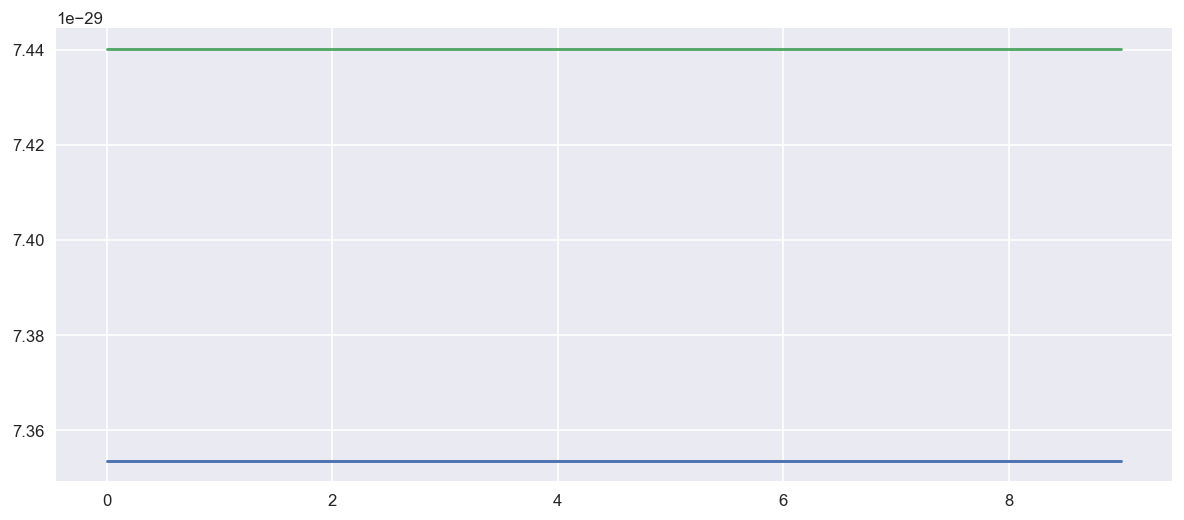

In [48]:
plt.plot(train_mse_cbr)
plt.plot(test_mse_cbr)

In [49]:
# mse RandomForest
rf = RandomForestRegressor(n_estimators=200)

In [50]:
train_mse_rf = []
test_mse_rf = []
for train_index, test_index in tss.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, y_train)
    
    mse_train = mean_squared_error(y_train, rf.predict(X_train))
    mse_test = mean_squared_error(y_test, rf.predict(X_test))
    print(f'Train mse: {mse_train}')
    print(f'Test mse: {mse_test}')
    print('-------------------------')
    
    train_mse_rf.append(mse_train)
    test_mse_rf.append(mse_test)

Train mse: 0.0004948499999998537
Test mse: 0.09702736706948718
-------------------------
Train mse: 0.0005954597615498628
Test mse: 0.0005745173716011322
-------------------------
Train mse: 0.00041642564870257343
Test mse: 8.730513595162583e-05
-------------------------
Train mse: 0.00021837621905474312
Test mse: 0.00016340030211475993
-------------------------
Train mse: 0.00014524984975960618
Test mse: 4.915785498485581e-05
-------------------------
Train mse: 0.00012086516290725793
Test mse: 5.652114803627184e-05
-------------------------
Train mse: 0.00012793153482372615
Test mse: 0.0005326027190331181
-------------------------
Train mse: 8.580824237860852e-05
Test mse: 9.364577039276659e-05
-------------------------
Train mse: 9.077033132529141e-05
Test mse: 0.0001043602719033169
-------------------------
Train mse: 6.742068394093676e-05
Test mse: 1.1374622356483999e-05
-------------------------


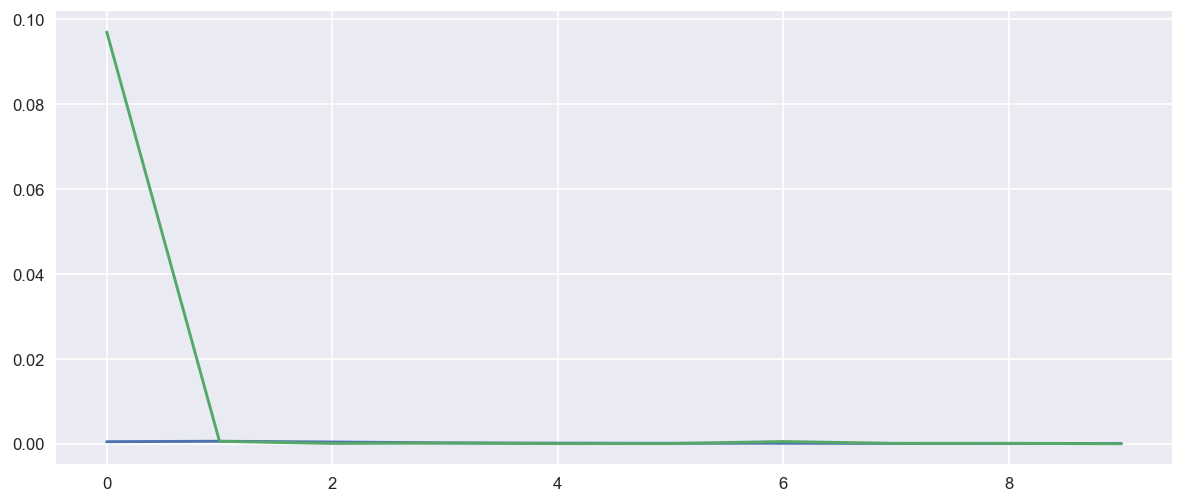

In [51]:
plt.plot(train_mse_rf)
plt.plot(test_mse_rf)